In [1]:
from typing import TypedDict
from langgraph.graph import START, END, StateGraph

/Users/anirudhiyer/Programming/LangGraph/LangGraph-Basics/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [ ]:
class AgentState(TypedDict) : 
    number1 : int
    number2 : int
    operation : str
    result : int

def addition_node(state : AgentState) -> AgentState : 
    """Node that performs addition operation"""
    state['result'] = state['number1'] + state['number2']
    return state

def subtraction_node(state : AgentState) -> AgentState : 
    """Node that performs subtraction operation"""
    state['result'] = state['number1'] - state['number2']
    return state

def routing_function(state : AgentState) -> AgentState : 
    """Function that performs routing logic"""
    if state['operation'] == '+' : 
        return "addition"
    
    elif state['operation'] == '-' : 
        return "subtraction"
    
    return state

In [ ]:
#Initializing the graph
graph = StateGraph(AgentState)

#Adding nodes to the graph
graph.add_node("addition_node", addition_node)
graph.add_node("subtraction_node", subtraction_node)
graph.add_node("routing_node", lambda x : x)

#Setting the start and finish point
graph.add_edge(START, "routing_node")
graph.add_edge("addition_node", END)
graph.add_edge("subtraction_node", END)

#Adding conditional edges to the graph
graph.add_conditional_edges("routing_node",
                            routing_function,
                            {
                                "addition" : "addition_node",
                                "subtraction" : "subtraction_node"
                            })

In [ ]:
#Compiling the graph
app = graph.compile()

#Executing the graph
result = app.invoke({
    'number1' : 2,
    'number2' : 3,
    'operation' : "+"

})

print(result['result'])

5


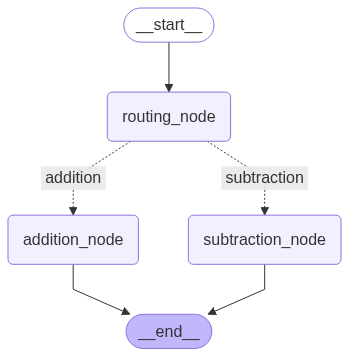

In [8]:
from IPython.display import Image
Image(app.get_graph().draw_mermaid_png())